In [36]:
import requests
import pandas as pd

# Tiingo API key
key = "5e5d08d156817da1de783637fe735a233734b7c8"

# Defineing the endpoint and parameters
ticker = "MSFT"  # Fetching data for Microsoft (MSFT)
url = f"https://api.tiingo.com/tiingo/daily/{ticker}/prices"
params = {
    'token': key,
    'startDate': '2015-01-01',
    'endDate': '2024-05-10'
}

# Makeing the request to Tiingo API
response = requests.get(url, params=params)

# Checking if the request was successful
if response.status_code == 200:
    data = response.json()
    # Convert data to DataFrame
    df = pd.DataFrame(data)
    # Save the DataFrame to a CSV file
    df.to_csv('MSFT.csv', index=False)
    print("Data saved to MSFT.csv")
else:
    print(f"Failed to fetch data: {response.status_code}")



Data saved to MSFT.csv


In [39]:
import pandas as pd
df=pd.read_csv('MSFT.csv')

In [40]:
df.head()

,date,close
0,02-01-15,46.760
1,05-01-15,46.325
2,06-01-15,45.650
3,07-01-15,46.230
4,08-01-15,47.590


In [ ]:
df.tail()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
2350,2024-05-06,413.54,413.93,406.3701,408.760,16996639,412.808209,413.197519,405.650997,408.036668,16996639,0.0,1.0
2351,2024-05-07,409.34,414.67,409.0900,414.660,20018228,408.615641,413.936209,408.366084,413.926227,20018228,0.0,1.0
2352,2024-05-08,410.54,412.23,406.7132,408.170,11792308,409.813518,411.500527,405.993490,407.447712,11792308,0.0,1.0
2353,2024-05-09,412.32,412.72,409.1000,410.570,14689727,411.590368,411.989660,408.376066,409.843465,14689727,0.0,1.0
2354,2024-05-10,414.74,415.38,411.8000,412.935,13402281,414.006085,414.644953,411.071288,412.204280,13402281,0.0,1.0


In [41]:
df1=df.reset_index()['close']

In [42]:
df1

0        46.760
1        46.325
2        45.650
3        46.230
4        47.590
         ...   
2350    413.540
2351    409.340
2352    410.540
2353    412.320
2354    414.740
Name: close, Length: 2355, dtype: float64

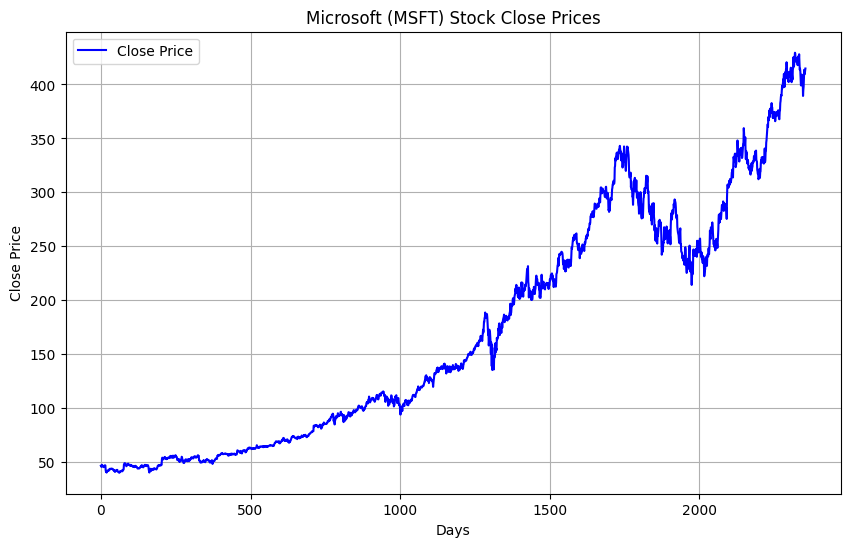

In [43]:
import matplotlib.pyplot as plt

# Plotting the 'close' prices
plt.figure(figsize=(10, 6))
plt.plot(df1, color='blue', label='Close Price')
plt.title('Microsoft (MSFT) Stock Close Prices')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


In [113]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Normalize the data
scaler = MinMaxScaler(feature_range=(0,1))
df1_scaled = scaler.fit_transform(np.array(df1).reshape(-1,1))

## Splitting dataset into train and test split
training_size = int(len(df1_scaled) * 0.7)
test_size = len(df1_scaled) - training_size
train_data, test_data = df1_scaled[0:training_size,:], df1_scaled[training_size:len(df1_scaled),:1]

# Function to create dataset with sliding window
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step):
        a = dataset[i:(i+time_step), 0]  # Features
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])  # Target variable
    return np.array(dataX), np.array(dataY)

# Define the time step
time_step = 100

# Create training and test sets with sliding window
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [118]:
print(X_test.shape), print(y_test.shape)

(607, 100, 1)
(607,)


(None, None)

In [119]:
# Define the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Train Loss: {train_loss}")
print(f"Test Loss: {test_loss}")

Epoch 1/100
25/25 [==============================] - 13s 236ms/step - loss: 0.0114 - val_loss: 0.0092
Epoch 2/100
25/25 [==============================] - 5s 190ms/step - loss: 6.2216e-04 - val_loss: 0.0022
Epoch 3/100
25/25 [==============================] - 6s 244ms/step - loss: 2.4406e-04 - val_loss: 0.0022
Epoch 4/100
25/25 [==============================] - 5s 186ms/step - loss: 2.1990e-04 - val_loss: 0.0022
Epoch 5/100
25/25 [==============================] - 6s 249ms/step - loss: 2.0398e-04 - val_loss: 0.0019
Epoch 6/100
25/25 [==============================] - 5s 185ms/step - loss: 2.4555e-04 - val_loss: 0.0032
Epoch 7/100
25/25 [==============================] - 5s 186ms/step - loss: 2.6155e-04 - val_loss: 0.0027
Epoch 8/100
25/25 [==============================] - 6s 246ms/step - loss: 2.2541e-04 - val_loss: 0.0019
Epoch 9/100
25/25 [==============================] - 5s 186ms/step - loss: 2.0922e-04 - val_loss: 0.0020
Epoch 10/100
25/25 [==============================] - 6s 2

In [141]:
from sklearn.metrics import mean_squared_error
import math

# Predicting train and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Reshape predictions to match expected shape
y_train_pred = y_train_pred.reshape(-1, 1)
y_test_pred = y_test_pred.reshape(-1, 1)

# Inverse transforming the scaled data to original scale
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_test_pred = scaler.inverse_transform(y_test_pred)

# Calculating RMSE for train and test data
train_rmse = math.sqrt(mean_squared_error(y_train_actual, y_train_pred))
test_rmse = math.sqrt(mean_squared_error(y_test_actual, y_test_pred))

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")


19/19 [==============================] - 1s 69ms/step
Train RMSE: 3.370420006845206
Test RMSE: 9.609840140796447


In [121]:
y_test_pred

array([[325.66425],
       [329.67416],
       [332.37225],
       [330.0692 ],
       [327.78882],
       [323.54172],
       [319.17664],
       [315.06094],
       [314.5596 ],
       [317.94046],
       [322.70007],
       [328.96237],
       [333.7803 ],
       [336.4939 ],
       [336.5062 ],
       [334.20618],
       [330.9706 ],
       [326.5455 ],
       [319.102  ],
       [311.76926],
       [307.06186],
       [305.33926],
       [305.93408],
       [308.56833],
       [307.75705],
       [306.95874],
       [304.64798],
       [302.4806 ],
       [300.69986],
       [298.14743],
       [296.04443],
       [292.76907],
       [292.0391 ],
       [293.8843 ],
       [298.78912],
       [304.64517],
       [308.5853 ],
       [311.56772],
       [309.8269 ],
       [307.2585 ],
       [303.79337],
       [301.7668 ],
       [302.9266 ],
       [302.92245],
       [300.057  ],
       [296.58255],
       [295.49524],
       [295.82968],
       [294.3511 ],
       [291.5196 ],


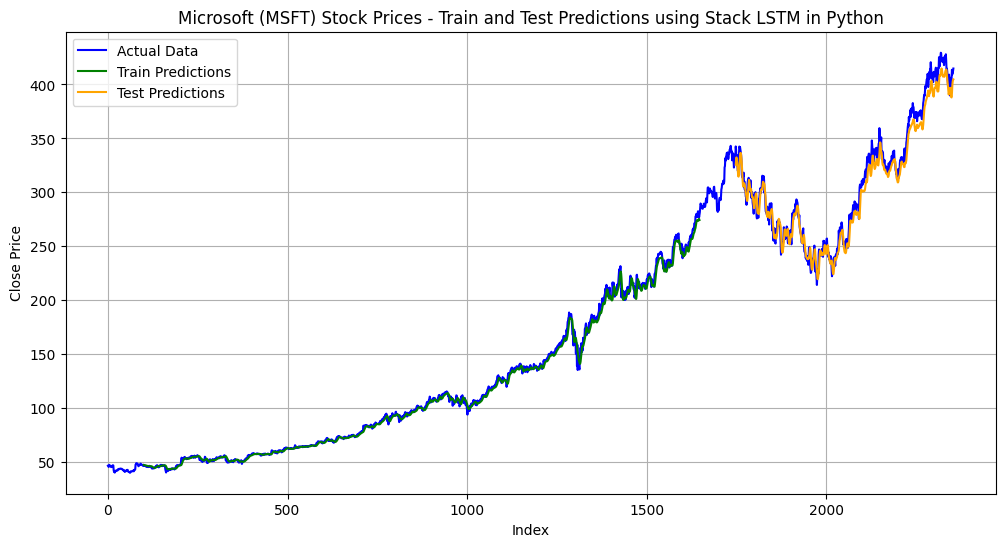

In [122]:
# Ensure that df1_scaled is also inverse transformed to original scale
df1_original = scaler.inverse_transform(df1_scaled)

# Plotting train and test predictions along with actual data
plt.figure(figsize=(12, 6))

# Creating empty arrays for plotting train and test predictions
trainPredictPlot = np.empty_like(df1_original)
trainPredictPlot[:, :] = np.nan
testPredictPlot = np.empty_like(df1_original)
testPredictPlot[:, :] = np.nan

# Plotting train predictions
train_pred_index = np.arange(time_step, time_step + len(y_train_pred))
trainPredictPlot[train_pred_index] = y_train_pred

# Plotting test predictions
test_pred_index = np.arange(len(df1_original) - len(y_test_pred), len(df1_original))
testPredictPlot[test_pred_index] = y_test_pred

# Plotting actual data
plt.plot(df1_original, label='Actual Data', color='blue')

# Plotting train predictions
plt.plot(trainPredictPlot, label='Train Predictions', color='green')

# Plotting test predictions
plt.plot(testPredictPlot, label='Test Predictions', color='orange')

plt.title('Microsoft (MSFT) Stock Prices - Train and Test Predictions using Stack LSTM in Python')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [142]:
# Predicting future prices for the next 15 days
future_predictions = []
last_sequence = df1_scaled[-time_step:].reshape(1, time_step, 1)  # Start prediction from the last sequence of the data

for _ in range(15):
    future_prediction = model.predict(last_sequence)[0][0]
    future_predictions.append(future_prediction)
    last_sequence = np.append(last_sequence[:, 1:, :], np.array([[future_prediction]]).reshape(1, 1, 1), axis=1)  # Update the sequence for the next prediction

# Inverse transforming future predictions to original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

1/1 [==============================] - 0s 63ms/step


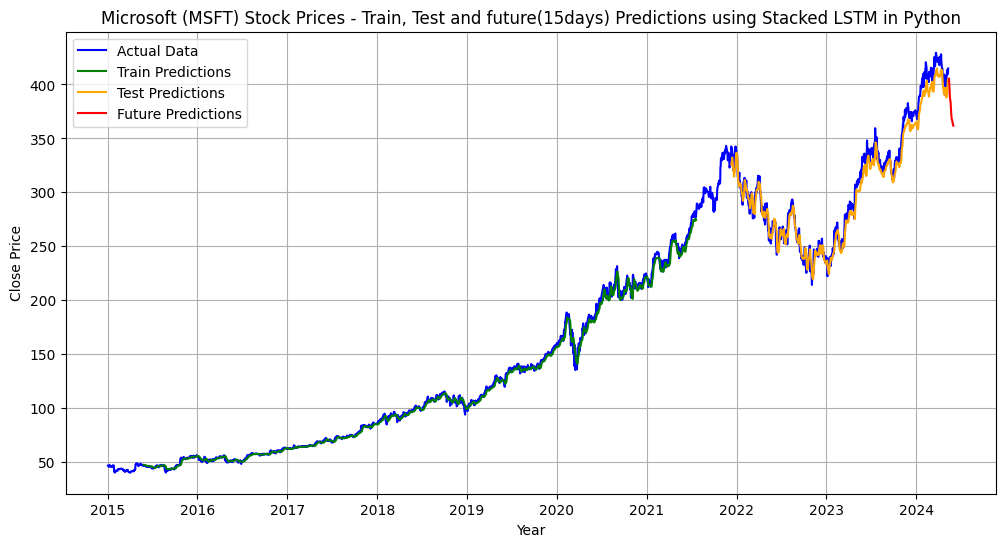

Future Predictions for the next 15 days:
Day 1: 405.2875671386719
Day 2: 402.41217041015625
Day 3: 397.89776611328125
Day 4: 392.84228515625
Day 5: 387.7278137207031
Day 6: 382.8234558105469
Day 7: 378.313720703125
Day 8: 374.3241271972656
Day 9: 370.9249267578125
Day 10: 368.1371154785156
Day 11: 365.94122314453125
Day 12: 364.2839660644531
Day 13: 363.09136962890625
Day 14: 362.27581787109375
Day 15: 361.7442321777344


In [156]:
# Generate date range for future predictions
end_date = df['date'].iloc[-1]
future_dates = pd.date_range(start=end_date, periods=15 + 1, freq='B')[1:]

# Plotting actual data
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df1_original, label='Actual Data', color='blue')

# Plotting train predictions
plt.plot(df['date'].iloc[train_pred_index], trainPredictPlot[train_pred_index], label='Train Predictions', color='green')

# Plotting test predictions
plt.plot(df['date'].iloc[test_pred_index], testPredictPlot[test_pred_index], label='Test Predictions', color='orange')

# Plotting future predictions
plt.plot(future_dates, future_predictions, label='Future Predictions', color='red')

plt.title('Microsoft (MSFT) Stock Prices - Train, Test and future(15days) Predictions using Stacked LSTM in Python')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Print future predictions
print("Future Predictions for the next 15 days:")
for i, pred in enumerate(future_predictions):
    print(f"Day {i + 1}: {pred[0]}")